## Tutorial II: Optimization in **pytorch** and NN introduction

<p>
Bern Winter School on Machine Learning, 2024<br>
Prepared by Mykhailo Vladymyrov and Matthew Vowels.
</p>

This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [ ]:
# time to teach without exercises 50mins

## 1. Load necessary libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim



## 2. Linear fit

Here we will solve an optimization problem to perform linear regression. First we will generate a training set of 80 data points and test set of 20, lying on a line with a random offset $$y = a_0 x + b_0 + \delta,$$ where $\delta$ is a random variable sampled from a uniform distribution with standard deviation equal to $s_0$.
<!-- o.f.: 46, 48, 87, 99 | val better than train: 47, 56, 86. -->

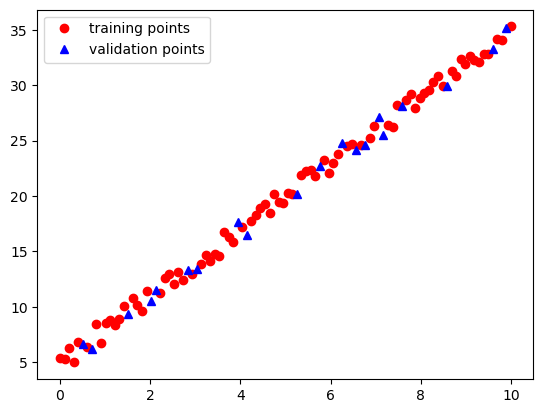

In [35]:
a0 = 3  # 3
b0 = 5  # 5
s0 = 1  # 1

n_all = 100

np.random.seed(99)

# all samples
x_all = np.linspace(0, 10, n_all)  # 100 points
d_all = np.random.uniform(-s0, s0, size=n_all)
y_all = np.asarray([a0*x + b0 + d for x, d in zip(x_all, d_all)])

# randomize order and get 80% for training
idx = np.random.permutation(n_all)
n_train = n_all * 80 // 100

idx_train = idx[0:n_train]
idx_val = idx[n_train:]

x_train, y_train = x_all[idx_train], y_all[idx_train]

x_val, y_val = x_all[idx_val], y_all[idx_val]

plt.plot(x_train, y_train, "or", x_val, y_val, "b^")
plt.legend(('training points', 'validation points'),  loc='upper left');

We will then define the loss function as the mean of squared residuals (distance from line along $y$) for the points.

We will use [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent): on each iteration use only a fraction (`batch_size`) of the whole training set. In many cases the training set is huge and, in principle, cannot be fed on each iteration. Also it can sometimes help the optimizer to properly explore the manifold.

In [36]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.a = nn.Parameter(torch.randn(1, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.a * x + self.b


def loss_f(true_y, y_predicted):
    return F.mse_loss(y_predicted, true_y)

In [37]:
x_train.shape, y_train.shape

((80,), (80,))

In [42]:
# Define the model
model = Linear()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.002)

# Define the number of epochs and batch size
batch_size = 2  # the training data set is split into "batch_size" batches 
epochs = 400     # an epoch is one iteration through the whole training dataset, i.e. an epoch in this case has 8 iterations, since the 80 point training dataset will be split into 10 batches


x_train = torch.tensor(x_train)  # watch out for d-type issues with torch.tensors
y_train = torch.tensor(y_train)

x_val = torch.tensor(x_val)
y_val = torch.tensor(y_val)


# Training loop
train_loss_history = []
val_loss_history = []
for epoch in range(epochs):
    model.train()  # as opposed to model.eval()
    batch_losses = []
    permutation = torch.randperm(x_train.size()[0])


    for i in range(0, x_train.size()[0], batch_size):
        optimizer.zero_grad()

        indices = permutation[i:i+batch_size]
        batch_x, batch_y = x_train[indices], y_train[indices]

        # Forward pass
        outputs = model(batch_x)

        # Compute the loss
        loss = loss_f(batch_y, outputs)
        batch_losses.append(loss.item())
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    average_training_loss = np.mean(batch_losses)
    train_loss_history.append(average_training_loss)

    # Validation step (optional, for monitoring performance)
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val)
        val_loss = loss_f(y_val, val_outputs)
        val_loss_history.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}, Validation Loss: {val_loss.item()}")



/var/folders/jz/7t_94n991b13sn849gsrqnx00000gp/T/ipykernel_28709/132361538.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train)  # watch out for d-type issues with torch.tensors
/var/folders/jz/7t_94n991b13sn849gsrqnx00000gp/T/ipykernel_28709/132361538.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train)
/var/folders/jz/7t_94n991b13sn849gsrqnx00000gp/T/ipykernel_28709/132361538.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val = torch.tensor(x_val)
/var/folders/jz/7t

Epoch 1/400, Validation Loss: 3.6268021805126986
Epoch 2/400, Validation Loss: 3.493286880419783
Epoch 3/400, Validation Loss: 3.1159641632600876
Epoch 4/400, Validation Loss: 2.9882444056368835
Epoch 5/400, Validation Loss: 2.6548760541526435
Epoch 6/400, Validation Loss: 2.4517935918434626
Epoch 7/400, Validation Loss: 2.3899033272839834
Epoch 8/400, Validation Loss: 2.12959780684277
Epoch 9/400, Validation Loss: 1.958202777646673
Epoch 10/400, Validation Loss: 1.8596015502951175
Epoch 11/400, Validation Loss: 1.8123040449723902
Epoch 12/400, Validation Loss: 1.5823546823591994
Epoch 13/400, Validation Loss: 1.55727421743638
Epoch 14/400, Validation Loss: 1.3698842976155399
Epoch 15/400, Validation Loss: 1.2853623989933338
Epoch 16/400, Validation Loss: 1.198230987317468
Epoch 17/400, Validation Loss: 1.120322620821328
Epoch 18/400, Validation Loss: 1.0500740856383166
Epoch 19/400, Validation Loss: 1.0840228630152693
Epoch 20/400, Validation Loss: 0.9443617390307025
Epoch 21/400, Val

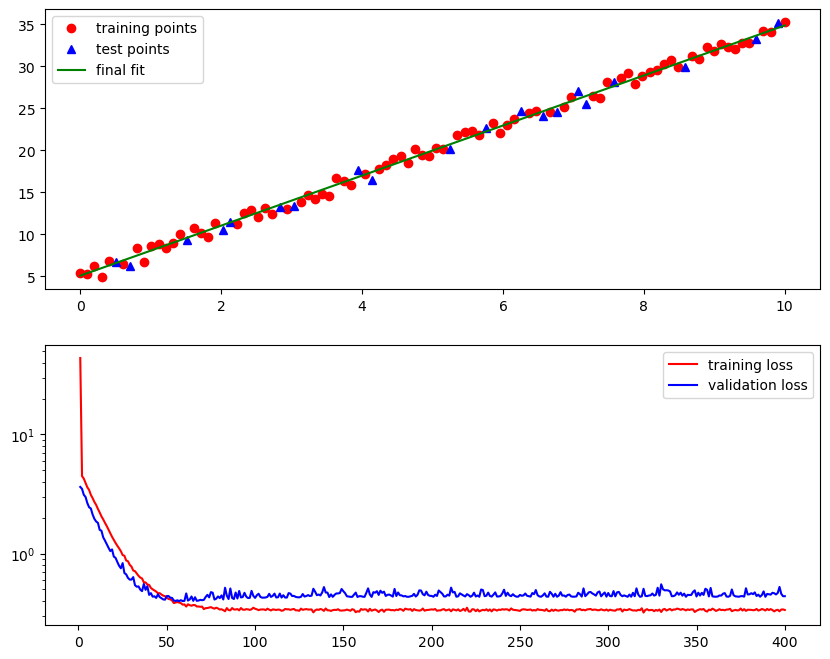

In [43]:
a_val, b_val = model.a.item(), model.b.item()

# Generate predictions for plotting
end_fit_x = [x_all[0], x_all[-1]]
end_fit_y = [a_val * x + b_val for x in end_fit_x]
true_fn_y = [a0 * x + b0 for x in end_fit_x]  # Assuming a0 and b0 are known true values

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting data points and model predictions
axs[0].plot(x_train, y_train, 'ro', x_val, y_val, 'b^', end_fit_x, end_fit_y, 'g')
axs[0].legend(('training points', 'test points', 'final fit'), loc='upper left')

# Assuming training and validation loss history are stored in lists: train_loss_history and val_loss_history
epochs = range(1, len(train_loss_history) + 1)

# Plotting loss history
axs[1].semilogy(epochs, train_loss_history, 'r')
axs[1].semilogy(epochs, val_loss_history, 'b')
axs[1].legend(('training loss', 'validation loss'), loc='upper right')

plt.show()

## 3. Exercise 1

Play with the true function parameters ```a0, b0, s0``` and the ``batch_size`` value, check how it affects the convergence.

1. How does a change of `s0` affect convergance?
2. When should one stop training to prevent overfitting?


#### Solution

Changing the batch size: 
- a smaller batch size increases the run time and the validation loss value intersects the training loss value at an earlier epoch (i.e., convergence happens at an earlier epoch). Noise in the validation loss function also increases
- a larger size has the opposite effect, convergence happens later, or doesn't happen at all. the fit is also worse (adding bias?) larger batch --> less samples (iterations per epoch), bigger chunks of data per epoch


## 4. Training loop

The training as we just saw is done iteratively, by adjusting the model parameters.

We perform optimization several times for all traininng dataset. Going through all this dataset is refered to as 'epoch'.

When we do training its usually done in two loops. In outer loop we iterate over all epochs. For each epoch we usually split the dataset into small chuncks, batches, and optimization it performed for all of those.

It is important that data doesn't go to the training pipeline in same order. So the overall scheme looks like this (pseudocode):


```
x,y = get_training_data()
for epoch in range(number_epochs):
   x_shfl,y_shfl = shuffle(x,y)
   
   for mb_idx in range(number_minibatches_in_batch):
       x_mb,y_mb = get_minibatch(x_shfl,y_shfl, mb_idx)
       
       optimize_on(data=x_mb, labels=y_mb)
```

## 5. Bulding blocks of a neural network

Neural network consists of layers of neurons. Each neuron perfroms 2 operations.

<img src="https://github.com/neworldemancer/BMLWS/raw/main/figures/Perceptron.png" alt="drawing" width="30%"/>

Each neuron performs 2 operations.

1. Calculate the linear transformation of the input vector $\mathbf{x}_i$:
$$z_i = \mathbf{w} \cdot \mathbf{x}_i + b = \sum_j {w_j x_{ij}} + b$$ where $\mathbf{w}$ is a weight vector and $b$ - a bias, and $j$ traverses each dimension of the input vector
2. Perform the nonlinear transformation of the result using the activation function $f$ $$y_i = f(z_i)$$

In a fully connected neural network, each layer is a set of N neurons, performing different transformations of the input $\mathbf{x}_i$ of the same layer, now producing an output **vector** $ \mathbf{y} _i = f(\mathbf{z}_i) = f(W\mathbf{x}_i + \mathbf{b})$ now with a bias vector $\mathbf{b}$ and a * *matrix** of weights $W$.

Since the output of each layer constitutes the input to the next layer, we can write for layer $l$: $$\mathbf{x}^l_i = f^{l-1}(\mathbf{W}^{ l-1} \mathbf{x}^{ l-1}_i + \mathbf{b}^{l-1})$$ where $\mathbf{x}_i^{l=0}$ is the vector d 'network input for data point $i$.

<img src="https://github.com/neworldemancer/BMLWS/raw/main/figures/MLP.png" alt="drawing" width="50%"/>

To simplify building the network, we'll define a helper function, creating neuron layer with given number of outputs:

In [ ]:
class Dense(nn.Module):
    def __init__(self, input_units, output_units, activation=None):
        """
        Fully connected layer implemented with explicit matrix multiplication.

        Parameters
        ----------
        input_units : int
            Number of input neurons
        output_units : int
            Number of output neurons
        activation : callable or None, optional
            Non-linear activation function (e.g., F.relu)
        """
        super(Dense, self).__init__()
        self.input_units = int(input_units)
        self.output_units = int(output_units)
        self.activation = activation

        # Initialize weights and biases
        self.weights = nn.Parameter(torch.randn(input_units, output_units))
        self.bias = nn.Parameter(torch.randn(output_units))

    def forward(self, x):
        """
        Forward pass through the layer.

        Parameters
        ----------
        x : torch.Tensor
            Input tensor

        Returns
        -------
        torch.Tensor
            Output of the layer
        """

        outputs = torch.matmul(x, self.weights) + self.bias

        # Apply activation function if provided
        if self.activation is not None:
            # Check if the activation function is softmax
            if self.activation == F.softmax:
                # Apply softmax with specified dimension
                outputs = self.activation(outputs, dim=1)
            else:
                # apply other activation functions normally
                outputs = self.activation(outputs)

        return outputs


In the case of multi-class classification, in the last layer, we can use the *softmax* transformation as a non-linear transformation. The softmax for the $j$th element of $\mathbf{z}_i$ is $$y_{ij} = \frac{e^{z_{ij}}}{\sum_{k=1}^{K} e^{z_{ik}}}$$ where $K$ is the total number of classes.


For example. before softmax $$[1.0, 2.0, 3.0, \mathbf{4.0} ]$$ and after: $$[0.0321, 0.0871, 0.2369, \mathbf{0.6439}]$$ (now the sum is equal to one)

We can also now compare the fundamental truth which could be $$[0,0,0,\mathbf{1}]$$ That is to say that class 4 is the good class and that the network predicted correctly.
## 6. Bulding a neural network

https://medium.com/geekculture/how-visualizations-help-make-sense-of-deep-learning-a408ab00688f

In [ ]:
n_input = 10
n_output = 2
num_datapoints = 1
input_tensor = torch.randn(num_datapoints, n_input)
dense = Dense(input_units=n_input , output_units=n_output, activation=torch.sigmoid)


# remember to matrix multiply A and B we need the shapes (a1 x a2) (b1 x b2) to be such that a2=b1
# the result will be (a1 x b2)

print(dense.weights.shape)
print(input_tensor.shape)
print(torch.matmul(input_tensor, dense.weights).shape) # this is XW  e.g. (1, 10)x(10, 2) = (1 x 2)

# notice that increasing the number of data points does not change the shape of W!
# This is important - the parameter shape should not change according to the number of datapoints, only their dimenaionality

torch.Size([10, 2])
torch.Size([1, 10])
torch.Size([1, 2])


In [ ]:
# if we want to stack multiple dense operations together
hidden_dim = 10
dense1 =  Dense(input_units=n_input , output_units=hidden_dim, activation=torch.sigmoid)
dense2 =  Dense(input_units=hidden_dim , output_units=n_output, activation=F.softmax)
output = dense2(dense1(input_tensor))

In [ ]:
# integrate everything into an overall model

class MyModel(nn.Module):
    def __init__(self, input_units, hidden_units, output_units):
        super(MyModel, self).__init__()
        # Define a Dense layer
        self.dense1 = Dense(input_units, hidden_units, activation=F.relu)
        # Define another Dense layer
        self.dense2 = Dense(hidden_units, output_units, activation=F.softmax)

    def forward(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return x

    def predict(self, x):
        # Forward pass and get predictions
        preds = self.dense2(self.dense1(x))
        print(preds)  # to check values before argmax
        return torch.argmax(preds, dim=1)

# Example usage
input_units = 10
hidden_units = 5
output_units = 2
model = MyModel(input_units, hidden_units, output_units)

# Create a sample input tensor
input_tensor = torch.randn(5, input_units)

# Get predictions
predictions = model.predict(input_tensor)
print(predictions)

tensor([[0.3706, 0.6294],
        [0.0025, 0.9975],
        [0.1835, 0.8165],
        [0.7004, 0.2996],
        [0.7276, 0.2724]], grad_fn=<SoftmaxBackward0>)
tensor([1, 1, 1, 0, 0])
